In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)


In [2]:
X_b = np.c_[np.ones((100,1)), X]

In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.96768042],
       [2.97916362]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [5]:
y_predict

array([[3.96768042],
       [9.92600766]])

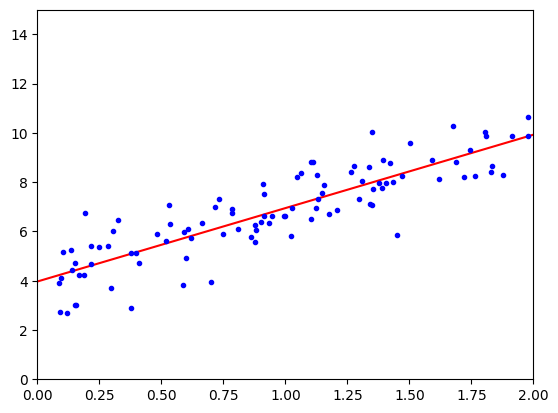

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.96768042]), array([[2.97916362]]))

In [8]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.96768042],
       [2.97916362]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.96768042],
       [2.97916362]])